# 2016 Asthma Dataset Analysis( Descriptive Analysis)

# Section 1: Loading and Preprocessing Data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from scipy.stats import norm, skew, kurtosis, pearsonr, chi2_contingency

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [13]:
#Load the dataset
asthma_data=pd.read_csv("C:\\Users\\n\\Downloads\\asthma_data_2016_preprocessed.csv")
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [14]:
asthma_data.head()

,DUPERSID,ADHECR42,AGE16X,BMINDX,FAMINC16,TTLP16X,UNEMP16X,SEX,ASPRIN53,ADAPPT42,RACETHX,TOTEXP16
0,10006101,0.900000,0.511628,0.293522,0.088404,0.164108,0.0,2,2,2,2,23
1,10008102,0.305235,0.232558,0.300607,0.172962,0.205962,0.0,1,2,0,2,3418
2,10008106,0.305235,0.116279,0.000000,0.172962,0.164108,0.0,2,-1,-1,2,1517
3,10019102,0.800000,0.860465,0.399798,0.191292,0.222397,0.0,2,1,4,2,15794
4,10034101,0.305235,0.883721,0.444332,0.112934,0.212918,0.0,1,2,-1,3,10340


In [15]:
asthma_data.tail()

,DUPERSID,ADHECR42,AGE16X,BMINDX,FAMINC16,TTLP16X,UNEMP16X,SEX,ASPRIN53,ADAPPT42,RACETHX,TOTEXP16
2205,80546101,0.800000,0.418605,0.463563,0.158320,0.303231,0.0,2,2,3,2,2659
2206,80550101,0.900000,0.790698,0.378543,0.233626,0.165023,0.0,2,2,6,2,18224
2207,80564101,1.000000,0.604651,0.355263,0.266508,0.266620,0.0,2,2,1,1,960
2208,80568101,0.900000,0.546512,0.351215,0.140156,0.208510,0.0,2,2,4,1,8422
2209,80568103,0.305235,0.151163,0.322874,0.140156,0.164108,0.0,1,-1,-1,1,6859


In [17]:
# Display basic information about the dataset
asthma_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2210 entries, 0 to 2209
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DUPERSID              2210 non-null   int64  
 1   ADHECR42              2210 non-null   float64
 2   AGE16X                2210 non-null   float64
 3   BMINDX                2210 non-null   float64
 4   FAMINC16              2210 non-null   float64
 5   TTLP16X               2210 non-null   float64
 6   UNEMP16X              2210 non-null   float64
 7   SEX                   2210 non-null   int64  
 8   ASPRIN53              2210 non-null   int64  
 9   ADAPPT42              2210 non-null   int64  
 10  RACETHX               2210 non-null   int64  
 11  TOTEXP16              2210 non-null   float64
 12  TOTEXP16_Categorical  2210 non-null   int32  
dtypes: float64(7), int32(1), int64(5)
memory usage: 233.1 KB


In [19]:
# Handle negative values in TOTEXP16
asthma_data = asthma_data[asthma_data['TOTEXP16'] >= 0]
print(asthma_data.head())

   DUPERSID  ADHECR42    AGE16X    BMINDX  FAMINC16   TTLP16X  UNEMP16X  SEX  \
0  10006101  0.900000  0.511628  0.293522  0.088404  0.164108       0.0    2   
1  10008102  0.305235  0.232558  0.300607  0.172962  0.205962       0.0    1   
2  10008106  0.305235  0.116279  0.000000  0.172962  0.164108       0.0    2   
3  10019102  0.800000  0.860465  0.399798  0.191292  0.222397       0.0    2   
4  10034101  0.305235  0.883721  0.444332  0.112934  0.212918       0.0    1   

   ASPRIN53  ADAPPT42  RACETHX  TOTEXP16  TOTEXP16_Categorical  
0         2         2        2  0.000055                     0  
1         2         0        2  0.008179                     1  
2        -1        -1        2  0.003630                     0  
3         1         4        2  0.037792                     1  
4         2        -1        3  0.024741                     1  


In [20]:
# Check for missing values
missing_values = asthma_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 DUPERSID                0
ADHECR42                0
AGE16X                  0
BMINDX                  0
FAMINC16                0
TTLP16X                 0
UNEMP16X                0
SEX                     0
ASPRIN53                0
ADAPPT42                0
RACETHX                 0
TOTEXP16                0
TOTEXP16_Categorical    0
dtype: int64


In [25]:
# Check data types
data_types = asthma_data.dtypes
print("\nData Types:\n", data_types)


Data Types:
 DUPERSID                  int64
ADHECR42                float64
AGE16X                  float64
BMINDX                  float64
FAMINC16                float64
TTLP16X                 float64
UNEMP16X                float64
SEX                       int64
ASPRIN53                  int64
ADAPPT42                  int64
RACETHX                   int64
TOTEXP16                float64
TOTEXP16_Categorical      int32
dtype: object


In [26]:
# Normalize numerical variables (max-min method)
numerical_cols = ['ADHECR42', 'AGE16X', 'BMINDX', 'FAMINC16', 'TTLP16X', 'UNEMP16X', 'TOTEXP16']
asthma_data[numerical_cols] = (asthma_data[numerical_cols] - asthma_data[numerical_cols].min()) / (asthma_data[numerical_cols].max() - asthma_data[numerical_cols].min())

# Convert TOTEXP16 to a categorical variable using median split
median_value = asthma_data['TOTEXP16'].median()
asthma_data['TOTEXP16_Categorical'] = np.where(asthma_data['TOTEXP16'] > median_value, 1, 0)

# Drop negative values and select instances where ASPRIN53 is positive
aspirin_data = asthma_data[asthma_data['ASPRIN53'] > 0].copy()
print("The TOTEXP16 medium value is: ",median_value )

The TOTEXP16 medium value is 0.006973789367393916


In [27]:
# Check for missing values
missing_values = asthma_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 DUPERSID                0
ADHECR42                0
AGE16X                  0
BMINDX                  0
FAMINC16                0
TTLP16X                 0
UNEMP16X                0
SEX                     0
ASPRIN53                0
ADAPPT42                0
RACETHX                 0
TOTEXP16                0
TOTEXP16_Categorical    0
dtype: int64


In [28]:
# Check data types
data_types = asthma_data.dtypes
print("\nData Types:\n", data_types)


Data Types:
 DUPERSID                  int64
ADHECR42                float64
AGE16X                  float64
BMINDX                  float64
FAMINC16                float64
TTLP16X                 float64
UNEMP16X                float64
SEX                       int64
ASPRIN53                  int64
ADAPPT42                  int64
RACETHX                   int64
TOTEXP16                float64
TOTEXP16_Categorical      int32
dtype: object


In [29]:
# Normalize numerical variables (max-min method)
numerical_cols = ['ADHECR42', 'AGE16X', 'BMINDX', 'FAMINC16', 'TTLP16X', 'UNEMP16X', 'TOTEXP16']
asthma_data[numerical_cols] = (asthma_data[numerical_cols] - asthma_data[numerical_cols].min()) / (asthma_data[numerical_cols].max() - asthma_data[numerical_cols].min())

In [30]:
# Convert TOTEXP16 to a categorical variable using median split
median_value = asthma_data['TOTEXP16'].median()
asthma_data['TOTEXP16_Categorical'] = np.where(asthma_data['TOTEXP16'] > median_value, 1, 0)

# Drop negative values and select instances where ASPRIN53 is positive
aspirin_data = asthma_data[asthma_data['ASPRIN53'] > 0].copy()


# Section 2: Random Sampling

Create 100 random samples for patients who are taking aspirin and patients who are not taking aspirin. Each group should have 100 samples independently. 

In [51]:
# Create random samples for patients taking and not taking aspirin
aspirin_group = aspirin_data.sample(100, random_state=1)
no_aspirin_group = asthma_data[asthma_data['ASPRIN53'] == 1].sample(100, random_state=1)
print("random samples for patients taking aspirin is:",aspirin_group)
print("\nrandom samples for patients not taking aspirin is:",no_aspirin_group)

random samples for patients taking aspirin is:       DUPERSID  ADHECR42    AGE16X    BMINDX  FAMINC16   TTLP16X  UNEMP16X  \
123   11283101  1.000000  0.767442  0.386640  0.198620  0.164108       0.0   
1655  75566101  0.305235  0.406977  0.360324  0.161996  0.310546       0.0   
1370  72864103  1.000000  0.244186  0.312753  0.270433  0.164108       0.0   
1030  19628101  0.800000  0.604651  0.399798  0.098772  0.184738       0.0   
842   17845101  1.000000  0.802326  0.402834  0.149921  0.203648       0.0   
...        ...       ...       ...       ...       ...       ...       ...   
1628  75351101  0.700000  0.674419  0.497976  0.160196  0.244726       0.0   
2053  78876103  1.000000  0.523256  0.580972  0.256071  0.254904       0.0   
1041  70061103  0.900000  0.325581  0.335020  0.130722  0.171430       0.0   
840   17833102  0.800000  0.767442  0.369433  0.353844  0.261622       0.0   
790   17388101  0.900000  0.453488  0.327935  0.296329  0.437175       0.0   

      SEX  ASPRI

# Section 3: Descriptive Statistics 

In [52]:
# Descriptive statistics
aspirin_stats = aspirin_group['TOTEXP16'].describe()
no_aspirin_stats = no_aspirin_group['TOTEXP16'].describe()

print("The descriptive statistics for the total medical expenditure (TOTEXP16)taking aspirin is:",aspirin_stats)
print("The descriptive statistics for the total medical expenditure (TOTEXP16) not taking aspirin is:",no_aspirin_stats)


The descriptive statistics for the total medical expenditure (TOTEXP16)taking aspirin is: count    100.000000
mean       0.022521
std        0.036998
min        0.000000
25%        0.003190
50%        0.009503
75%        0.022778
max        0.203222
Name: TOTEXP16, dtype: float64
The descriptive statistics for the total medical expenditure (TOTEXP16) not taking aspirin is: count    100.000000
mean       0.031513
std        0.037962
min        0.000000
25%        0.007011
50%        0.019729
75%        0.033735
max        0.219486
Name: TOTEXP16, dtype: float64


# Section  4:Boxplot

The descriptive statistics for the total medical expenditure (TOTEXP16)taking aspirin is: count    100.000000
mean       0.022521
std        0.036998
min        0.000000
25%        0.003190
50%        0.009503
75%        0.022778
max        0.203222
Name: TOTEXP16, dtype: float64
The descriptive statistics for the total medical expenditure (TOTEXP16) not taking aspirin is: count    100.000000
mean       0.031513
std        0.037962
min        0.000000
25%        0.007011
50%        0.019729
75%        0.033735
max        0.219486
Name: TOTEXP16, dtype: float64


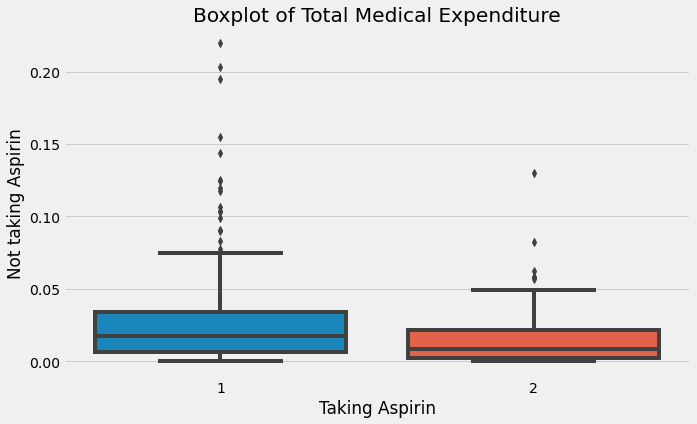

skewness and kurtosis are as given below:

skewness_aspirin 3.16488402657343
kurtosis_aspirin 10.755348026512207
skewness_no_aspirin 2.2001352270972476
kurtosis_no_aspirin 5.714436233146854


In [65]:
# Descriptive statistics
aspirin_stats = aspirin_group['TOTEXP16'].describe()
no_aspirin_stats = no_aspirin_group['TOTEXP16'].describe()

print("The descriptive statistics for the total medical expenditure (TOTEXP16)taking aspirin is:",aspirin_stats)
print("The descriptive statistics for the total medical expenditure (TOTEXP16) not taking aspirin is:",no_aspirin_stats)

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='ASPRIN53', y='TOTEXP16', data=pd.concat([aspirin_group, no_aspirin_group]))
# y.label("Not taking Aspirin")
plt.xlabel("Taking Aspirin")
plt.ylabel("Not taking Aspirin")
plt.title('Boxplot of Total Medical Expenditure')
plt.show()

# Calculate skewness and kurtosis
skewness_aspirin = skew(aspirin_group['TOTEXP16'])
kurtosis_aspirin = kurtosis(aspirin_group['TOTEXP16'])
skewness_no_aspirin = skew(no_aspirin_group['TOTEXP16'])
kurtosis_no_aspirin = kurtosis(no_aspirin_group['TOTEXP16'])

print("skewness and kurtosis are as given below:\n")
print("skewness_aspirin",skewness_aspirin)
print("kurtosis_aspirin",kurtosis_aspirin)
print("skewness_no_aspirin",skewness_no_aspirin)
print("kurtosis_no_aspirin",kurtosis_no_aspirin)

# Section 5 and 6: Normal Distribution Check

The calculated skewness and kurtosis are as given below:

skewness_aspirin 3.16488402657343
kurtosis_aspirin 10.755348026512207
skewness_no_aspirin 2.2001352270972476
kurtosis_no_aspirin 5.714436233146854


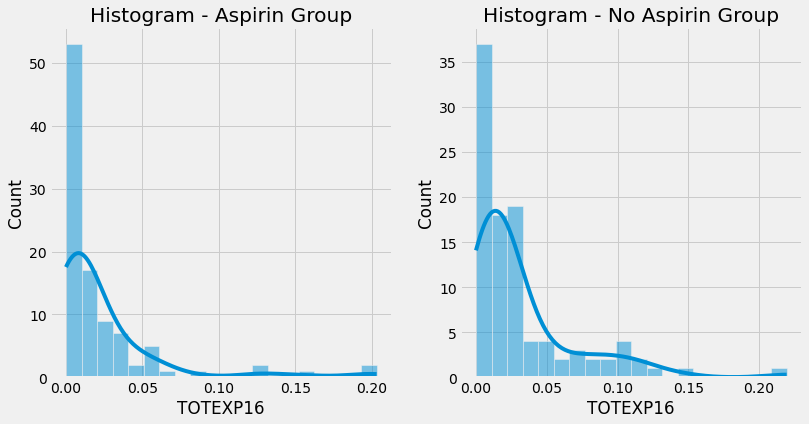

In [66]:
# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(aspirin_group['TOTEXP16'], bins=20, kde=True)
plt.title('Histogram - Aspirin Group')

plt.subplot(1, 2, 2)
sns.histplot(no_aspirin_group['TOTEXP16'], bins=20, kde=True)
plt.title('Histogram - No Aspirin Group')

# Calculate skewness and kurtosis
skewness_aspirin = skew(aspirin_group['TOTEXP16'])
kurtosis_aspirin = kurtosis(aspirin_group['TOTEXP16'])
skewness_no_aspirin = skew(no_aspirin_group['TOTEXP16'])
kurtosis_no_aspirin = kurtosis(no_aspirin_group['TOTEXP16'])

print("The calculated skewness and kurtosis are as given below:\n")
print("skewness_aspirin",skewness_aspirin)
print("kurtosis_aspirin",kurtosis_aspirin)
print("skewness_no_aspirin",skewness_no_aspirin)
print("kurtosis_no_aspirin",kurtosis_no_aspirin)


# Section 7, 8, and 9: Correlation Coefficients

In [45]:
# Calculate correlation coefficients for numerical variables
correlation_age_adherence, _ = pearsonr(asthma_data['AGE16X'], asthma_data['ADHECR42'])
correlation_unemployment_adherence, _ = pearsonr(asthma_data['UNEMP16X'], asthma_data['ADHECR42'])

# Display correlation coefficients
print("Pearson correlation coefficient between 'AGE16X' and 'ADHECR42':", correlation_age_adherence)
print("Pearson correlation coefficient between 'UNEMP16X' and 'ADHECR42':", correlation_unemployment_adherence)


Pearson correlation coefficient between 'AGE16X' and 'ADHECR42': 0.5547603292854282
Pearson correlation coefficient between 'UNEMP16X' and 'ADHECR42': 0.027850536381503543


# Section 10: Calculate the Chi-square correlation coefficient between "ASPRIN53" and "TOTEXP16_Categorical".

In [46]:
# Calculate the Chi-square correlation coefficient
contingency_table = pd.crosstab(aspirin_data['ASPRIN53'], aspirin_data['TOTEXP16_Categorical'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-square correlation coefficient between 'ASPRIN53' and 'TOTEXP16_Categorical':", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Contingency Table (Observed):\n", contingency_table)
print("Contingency Table (Expected):\n", expected)


Chi-square correlation coefficient between 'ASPRIN53' and 'TOTEXP16_Categorical': 55.12085163744185
p-value: 1.1334209501149483e-13
Degrees of Freedom: 1
Contingency Table (Observed):
 TOTEXP16_Categorical    0    1
ASPRIN53                      
1                      83  289
2                     493  624
Contingency Table (Expected):
 [[143.9032908 228.0967092]
 [432.0967092 684.9032908]]


# Section 11: Can you apply the Chi-square test based on the number of null transactions?

In [67]:
# Assuming "null transactions" refer to zero values in TOTEXP16
# Perform a Chi-square test based on the number of zero transactions
contingency_table_null_transactions = pd.crosstab(aspirin_data['ASPRIN53'], aspirin_data['TOTEXP16'] == 0)
chi2_null_transactions, p_value_null_transactions, dof_null_transactions, expected_null_transactions = chi2_contingency(contingency_table_null_transactions)

# Display results
print("Chi-square correlation coefficient based on null transactions (TOTEXP16 == 0):", chi2_null_transactions)
print("p-value:", p_value_null_transactions)
print("Degrees of Freedom:", dof_null_transactions)
print("Contingency Table (Observed):\n", contingency_table_null_transactions)
print("Contingency Table (Expected):\n", expected_null_transactions)


Chi-square correlation coefficient based on null transactions (TOTEXP16 == 0): 7.047596292645479
p-value: 0.007937169190417688
Degrees of Freedom: 1
Contingency Table (Observed):
 TOTEXP16  False  True
ASPRIN53             
1           370     2
2          1081    36
Contingency Table (Expected):
 [[ 362.50638012    9.49361988]
 [1088.49361988   28.50638012]]


# Section 12: Independent Samples t-test using the random samples obtained in Question 2.

In [83]:
# Separate the two groups
aspirin_group = asthma_data[asthma_data['ASPRIN53'] == 1]['TOTEXP16']
no_aspirin_group = asthma_data[asthma_data['ASPRIN53'] == 2]['TOTEXP16']

# Perform Independent Samples t-test
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(aspirin_group, no_aspirin_group, equal_var=False)

# Display the test statistics and p-value
print(f"Independent Samples t-test:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


Independent Samples t-test:
T-statistic: 5.3799736606648025
P-value: 1.1726695085136701e-07


# THE END**